In [2]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import pandas as pd

def read_csv_file(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)
    
    # Assign column values to variables
    levels = df['n']
    l2_error = df['l2']
    lI_error = df['lI']
    
    return levels, l2_error, lI_error

In [4]:
directory = '/Users/damynchipman/packages/EllipticForest/build-feature-adaptive-build/examples/toybox/'
adaptive_levels, adaptive_l2_error, adaptive_lI_error = read_csv_file(directory + 'error-adaptive-levels.csv')
full_levels, full_l2_error, full_lI_error = read_csv_file(directory + 'error-full-levels.csv')

adaptive_refinement_levels = adaptive_levels[:6]
adaptive_refinement_l2_error = adaptive_l2_error[:6]
adaptive_refinement_lI_error = adaptive_lI_error[:6]

adaptive_coarsening_levels = np.flip(adaptive_levels[5:])
adaptive_coarsening_l2_error = np.flip(adaptive_l2_error[5:])
adaptive_coarsening_lI_error = np.flip(adaptive_lI_error[5:])

full_refinement_levels = full_levels[:6]
full_refinement_l2_error = full_l2_error[:6]
full_refinement_lI_error = full_lI_error[:6]

full_coarsening_levels = np.flip(full_levels[5:])
full_coarsening_l2_error = np.flip(full_l2_error[5:])
full_coarsening_lI_error = np.flip(full_lI_error[5:])

In [16]:
adaptive_refinement_levels

0    1
1    2
2    3
3    4
4    5
5    6
Name: n, dtype: int64

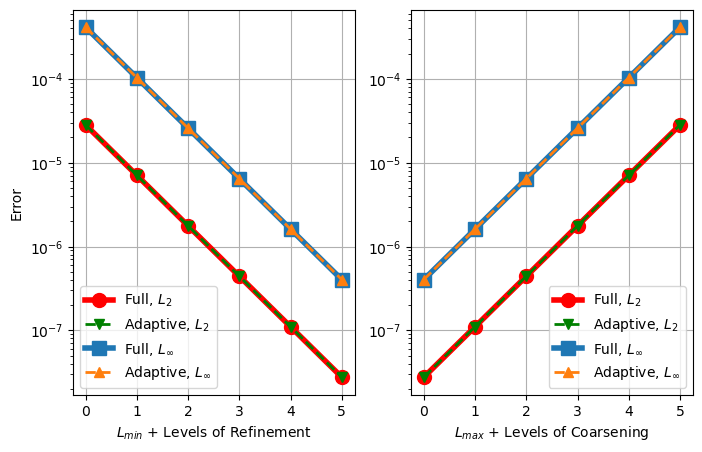

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))

axs[0].semilogy(np.arange(6), full_refinement_l2_error, label=r'Full, $L_2$', marker='o', lw=4, ms=10, color='red')
axs[0].semilogy(np.arange(6), adaptive_refinement_l2_error, label=r'Adaptive, $L_2$', marker='v', lw=2, ms=7, ls='--', color='green')
axs[0].semilogy(np.arange(6), full_refinement_lI_error, label=r'Full, $L_{\infty}$', marker='s', lw=4, ms=10)
axs[0].semilogy(np.arange(6), adaptive_refinement_lI_error, label=r'Adaptive, $L_{\infty}$', marker='^', lw=2, ms=7, ls='--')

axs[0].set_xlabel(r'$L_{min}$ + Levels of Refinement')
axs[0].set_ylabel('Error')
axs[0].legend(loc='lower left')
axs[0].grid()

# axs[1].semilogy(np.arange(6), adaptive_coarsening_l2_error[::-1])
# axs[1].semilogy(np.arange(6), adaptive_coarsening_lI_error[::-1])
# axs[1].semilogy(np.arange(6), full_coarsening_l2_error[::-1])
# axs[1].semilogy(np.arange(6), full_coarsening_lI_error[::-1])

axs[1].semilogy(np.arange(6), full_coarsening_l2_error[::-1], label=r'Full, $L_2$', marker='o', lw=4, ms=10, color='red')
axs[1].semilogy(np.arange(6), adaptive_coarsening_l2_error[::-1], label=r'Adaptive, $L_2$', marker='v', lw=2, ms=7, ls='--', color='green')
axs[1].semilogy(np.arange(6), full_coarsening_lI_error[::-1], label=r'Full, $L_{\infty}$', marker='s', lw=4, ms=10)
axs[1].semilogy(np.arange(6), adaptive_coarsening_lI_error[::-1], label=r'Adaptive, $L_{\infty}$', marker='^', lw=2, ms=7, ls='--')

axs[1].set_xlabel(r'$L_{max}$ + Levels of Coarsening')
axs[1].legend(loc='lower right')
axs[1].grid()

plt.savefig('full-vs-adaptive-convergence-no-title.pdf')
plt.savefig('full-vs-adaptive-convergence-no-title.png')

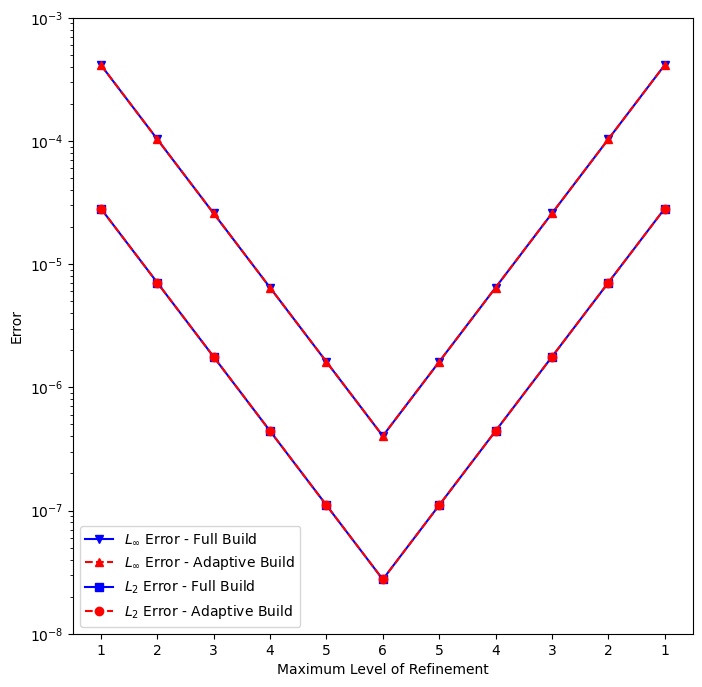

In [4]:
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]

patch_size = 8
eff_resolution = 2**np.array(2*adaptive_levels - 1)*patch_size

# Create figure
fig, ax1 = plt.subplots(figsize=(8, 8))

# Plot for full and adaptive methods
ax1.semilogy(full_lI_error, 'b-v', label=r'$L_{\infty}$ Error - Full Build')
ax1.semilogy(adaptive_lI_error, 'r--^', label=r'$L_{\infty}$ Error - Adaptive Build')
ax1.semilogy(full_l2_error, 'b-s', label=r'$L_2$ Error - Full Build')
ax1.semilogy(adaptive_l2_error, 'r--o', label=r'$L_2$ Error - Adaptive Build')
ax1.set_xticks(x_ticks, labels=x_labels)
ax1.set_xlabel('Maximum Level of Refinement')
ax1.set_ylabel('Error')
ax1.set_ylim([1e-8, 1e-3])
ax1.legend(loc='lower left')

plt.savefig('adaptive-vs-full-build-error-levels.pdf')
plt.savefig('adaptive-vs-full-build-error-levels.png')

# Show the plot
plt.show()


In [33]:
import numpy as np

def read_binary_matrix(filename):
    with open(filename, 'rb') as file:
        # Read the number of rows and columns
        num_rows = np.fromfile(file, dtype=np.int32, count=1)[0]
        num_cols = np.fromfile(file, dtype=np.int32, count=1)[0]
        
        # Read the data as a 1D array
        data = np.fromfile(file, dtype=np.float64)
        
        # Reshape the data into a matrix
        matrix = np.reshape(data, (num_rows, num_cols))
        
        return matrix
    
def read_binary_vector(filename):
    with open(filename, 'rb') as file:
        # Read the number of rows and columns
        num_rows = np.fromfile(file, dtype=np.int32, count=1)[0]
        
        # Read the data as a 1D array
        vector = np.fromfile(file, dtype=np.float64)
        
        return vector

In [36]:
import glob

directory = '/Users/damynchipman/packages/EllipticForest/build-feature-adaptive-build/examples/toybox/'
file_pattern = '*.bin'

file_list = glob.glob(directory + '/' + file_pattern)

data = {}
for file in file_list:
    filename = file.split('/')[-1]
    if "vector" in filename:
        data[filename[:-4]] = read_binary_vector(file)
    elif "matrix" in filename:
        data[filename[:-4]] = read_binary_matrix(file)


In [30]:
left_step = '1'
right_step = '2'
left_patch = '00'
right_patch = '00'
operator = 'matrix_T'
np.max(data['step-' + left_step + '-p' + left_patch + '-' + operator] - data['step-' + right_step + '-p' + right_patch + '-' + operator])

0.0

In [31]:
quad_refined = "03"
paths = ["0", "00", "01", "02", "03", quad_refined + "0", quad_refined + "1", quad_refined + "2", quad_refined + "3"]
operators = ["matrix_T", "matrix_S", "vector_g", "vector_u", "vector_h", "vector_w"]
for path in paths:
    for operator in operators:
        step1 = data['step-1' + '-p' + path + '-' + operator]
        step2 = data['step-2' + '-p' + path + '-' + operator]
        err = math.inf
        try:
            err = np.max(step1 - step2)
        except:
            print('path: %s, operator: %s, sizes: (1) %i, (2) %i' % (path, operator, np.size(step1), np.size(step2)))
            continue
        print('path: %s, operator: %s, diff = %.8e' % (path, operator, err))
    print()


path: 0, operator: matrix_T, diff = 0.00000000e+00
path: 0, operator: matrix_S, diff = 0.00000000e+00
path: 0, operator: vector_g, diff = 0.00000000e+00
path: 0, operator: vector_u, sizes: (1) 0, (2) 0
path: 0, operator: vector_h, diff = 2.40780179e-03
path: 0, operator: vector_w, diff = 2.99202964e-03

path: 00, operator: matrix_T, diff = 0.00000000e+00
path: 00, operator: matrix_S, sizes: (1) 0, (2) 0
path: 00, operator: vector_g, diff = 2.73842969e-03
path: 00, operator: vector_u, diff = 2.66427675e-03
path: 00, operator: vector_h, diff = 0.00000000e+00
path: 00, operator: vector_w, sizes: (1) 0, (2) 0

path: 01, operator: matrix_T, diff = 0.00000000e+00
path: 01, operator: matrix_S, sizes: (1) 0, (2) 0
path: 01, operator: vector_g, diff = 2.99202964e-03
path: 01, operator: vector_u, diff = 2.81613855e-03
path: 01, operator: vector_h, diff = 0.00000000e+00
path: 01, operator: vector_w, sizes: (1) 0, (2) 0

path: 02, operator: matrix_T, diff = 0.00000000e+00
path: 02, operator: matri

In [49]:
# Read the CSV file into a DataFrame
full_df = pd.read_csv(directory + 'error-full.csv')
adaptive_df = pd.read_csv(directory + 'error-adaptive.csv')

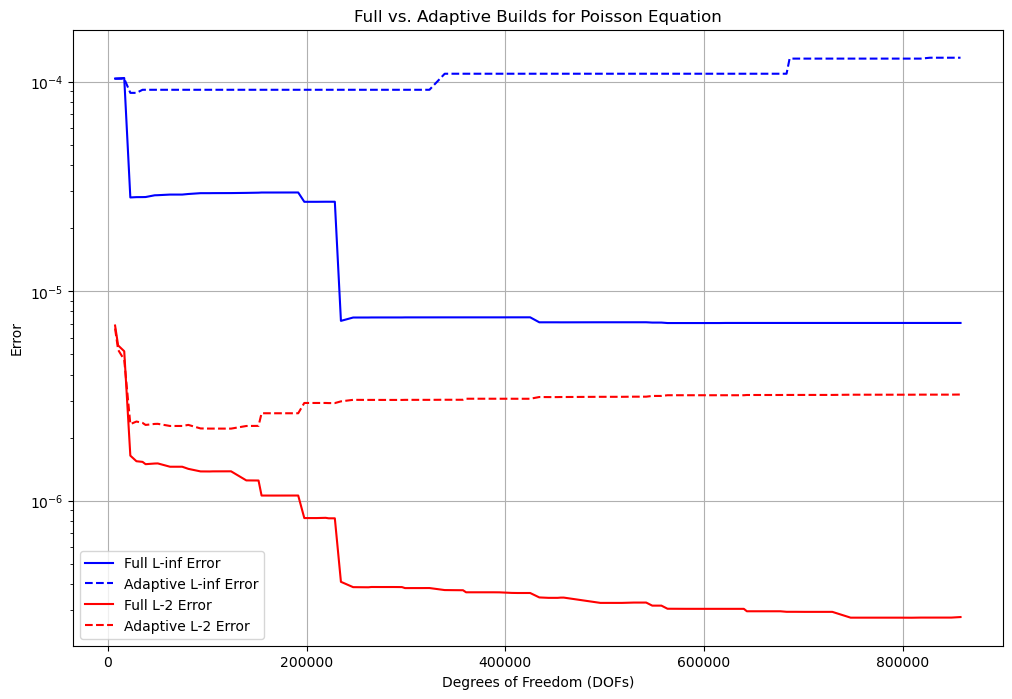

<Figure size 640x480 with 0 Axes>

In [53]:

# Create figure
plt.figure(figsize=(12, 8))

# Plot for full and adaptive methods
plt.plot(full_df[' DOFs'], full_df[' lI'], 'b-', label='Full L-inf Error')
plt.plot(adaptive_df[' DOFs'], adaptive_df[' lI'], 'b--', label='Adaptive L-inf Error')
plt.plot(full_df[' DOFs'], full_df[' l2'], 'r-', label='Full L-2 Error')
plt.plot(adaptive_df[' DOFs'], adaptive_df[' l2'], 'r--', label='Adaptive L-2 Error')

# Adding legend, titles, and labels
plt.legend()
plt.xlabel('Degrees of Freedom (DOFs)')
plt.ylabel('Error')
plt.xscale('linear')
plt.yscale('log')
plt.title('Full vs. Adaptive Builds for Poisson Equation')
plt.grid(True)

# Show the plot
plt.show()
plt.savefig('adaptive-vs-full-build-error.pdf')
plt.savefig('adaptive-vs-full-build-error.png')
